In [1]:
from logistic_regression import LogisticRegression
from utility import parse_data, how_good


model = LogisticRegression("../rp.data", n = 15000, lr = 0.025)
model.select_fraction(0.625)
model.fit(0.00001)

a, p, s, ss = model.check_accuracy()
print(how_good(p, s))

0.935064935064935


In [5]:
import numpy as np
from naive_classificator import NaiveClassificator
model = NaiveClassificator("../rp.data")
model.select_fraction(0.125)
model.estimate()
array = model.compare()
print(model.check_accuracy())
for x in array:
    print(f"{x[0]} : {float(x[1]):.3f}")


(0.9690265486725663, 0.9390243902439024, 0.9746835443037974, 0.9659863945578231)
0 : 0.000
0 : 0.000
1 : 1.000
0 : 0.000
1 : 1.000
0 : 0.000
0 : 0.000
0 : 0.000
1 : 1.000
0 : 0.000
0 : 0.000
0 : 0.000
0 : 0.000
0 : 0.000
0 : 0.000
1 : 0.522
0 : 0.000
0 : 0.000
1 : 1.000
0 : 0.000
0 : 0.000
0 : 0.000
0 : 0.000
0 : 0.000
0 : 0.000
1 : 1.000
0 : 0.003
1 : 0.993
1 : 0.975
1 : 1.000
0 : 0.000
0 : 0.000
1 : 1.000
0 : 0.000
0 : 0.000
0 : 0.000
0 : 0.485
0 : 0.000
0 : 0.000
1 : 1.000
0 : 0.000
1 : 1.000
1 : 1.000
0 : 0.000
0 : 0.000
1 : 0.991
0 : 0.000
1 : 1.000
1 : 1.000
0 : 0.000
1 : 1.000
0 : 0.000
1 : 0.925
1 : 1.000
0 : 0.000
1 : 1.000
0 : 0.000
0 : 0.000
0 : 0.985
0 : 0.000
0 : 0.000
0 : 1.000
0 : 0.000
1 : 0.984
0 : 0.000
1 : 1.000
0 : 0.000
0 : 0.000
0 : 0.000
0 : 0.000
1 : 0.997
0 : 0.000
0 : 0.000
0 : 0.000
1 : 1.000
0 : 0.000
1 : 1.000
1 : 0.899
1 : 1.000
0 : 0.000
1 : 0.993
1 : 0.026
1 : 1.000
1 : 1.000
1 : 0.919
1 : 1.000
0 : 0.000
1 : 1.000
0 : 0.000
1 : 1.000
0 : 0.000
0 : 0.000

In [5]:
import numpy as np
from naive_classificator import NaiveClassificator
from utility import how_good, plot_data
F = [0.01, 0.02, 0.03, 0.125, 0.625, 1]
res = []
for frac in F:
    results = []
    for i in range(20):
        model = NaiveClassificator("../rp.data")
        model.select_fraction(frac)
        model.estimate()
        a, p, s, ss = model.check_accuracy()
        results.append(how_good(p, s))
    result = np.mean(results)
    res.append(result)

In [6]:
import numpy as np
from logistic_regression import LogisticRegression
from utility import how_good, plot_data
F = [0.01, 0.02, 0.03, 0.125, 0.625, 1]
res = []
for frac in F:
    results = []
    for i in range(5):
        model = LogisticRegression("../rp.data", n = 15000, lr = 0.025)
        model.select_fraction(frac)
        model.fit()
        a, p, s, ss = model.check_accuracy()
        results.append(how_good(p, s))
    result = np.mean(results)
    res.append(result) 

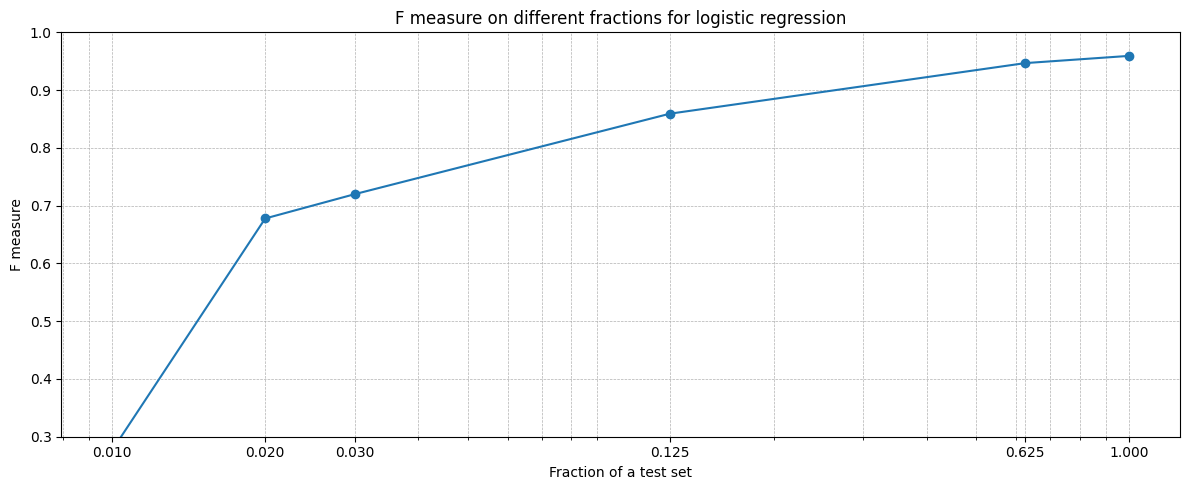

In [7]:
plot_data(F, res, "F measure on different fractions for logistic regression", "Fraction of a test set", "F measure")